<a href="https://colab.research.google.com/github/ahammedshaneebnk/AI_2025/blob/main/ANN/2025_001_Simple_ANN_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [35]:
import numpy as np

from copy       import deepcopy
from matplotlib import pyplot as plt

# Data

In [36]:
x = np.array([[1,1]])
y = np.array([[0]])

In [37]:
x.shape

(1, 2)

In [38]:
y.shape

(1, 1)

# Initial Weights

In [39]:
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T,
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
]

In [40]:
for w in W:
    print(w.shape)

(2, 3)
(3,)
(3, 1)
(1,)


# Sigmoid Activation Function

In [41]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# MSE Loss Function

In [42]:
def mse(y, y_):
    return np.mean(np.square(y - y_))

# Feed Forward

In [43]:
def feed_forward(inputs, outputs, weights):
    pre_hidden  = np.dot(inputs, weights[0]) + weights[1]
    hidden      = sigmoid(pre_hidden)
    out         = np.dot(hidden, weights[2]) + weights[3]
    return mse(out, outputs)

# Update Weights

In [44]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights     = deepcopy(weights)
    updated_weights  = deepcopy(weights)
    original_loss    = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights               = deepcopy(weights)
            temp_weights[i][index]    += 0.0001
            _loss_plus                 = feed_forward(inputs, outputs, temp_weights)
            grad                       = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

# Train

In [45]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x, y, W, 0.01)
    losses.append(loss)

Text(0.5, 1.0, 'Loss vs Epochs')

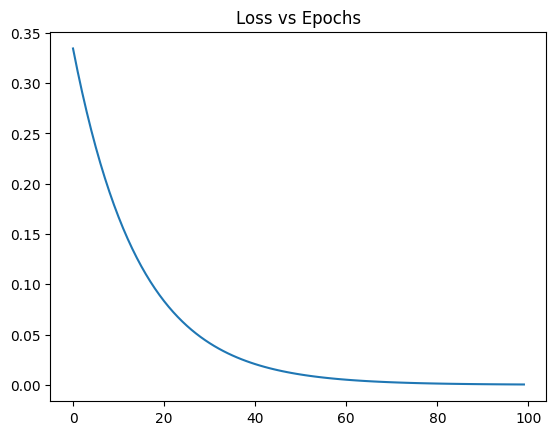

In [46]:
plt.plot(losses)
plt.title('Loss vs Epochs')

In [47]:
W

[array([[ 0.01424004, -0.5907864 , -0.27549535],
        [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32),
 array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32),
 array([[ 0.3475135 ],
        [-0.05529078],
        [ 0.03760847]], dtype=float32),
 array([-0.22443289], dtype=float32)]

# Predict

In [48]:
pre_hidden = np.dot(x, W[0]) + W[1]
hidden     = sigmoid(pre_hidden)
out        = np.dot(hidden, W[2]) + W[3]
print(f"Predicted Output: {out}")

Predicted Output: [[-0.0174781]]
